In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.set_option('display.max_columns',500)

# Reading the clean and merged Dataset

In [3]:
df=pd.read_csv(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/final_data_avg_SC_scores.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (74,91,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.shape

(14356, 130)

In [5]:
df.isnull().sum()

date                         0
asin                         0
year                         0
weeknum                      0
fiscal_year                  0
                         ...  
qna_answered                 0
summary_pr_translated    12356
text_pr_translated       12328
text_sentiment_sc            0
summary_sentiment_sc         0
Length: 130, dtype: int64

In [6]:
df.head()

date        asin  year  weeknum  fiscal_year  fiscal_month  \
0  20-12-2020  B000W6PY1W  2020       51         2020            12   
1  20-12-2020  B071936B11  2020       51         2020            12   
2  20-12-2020  B075KJBF9H  2020       51         2020            12   
3  20-12-2020  B07BVW522M  2020       51         2020            12   
4  20-12-2020  B07JMXSSYN  2020       51         2020            12   

   first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                         240.7                              210.85   
1                         197.6                              173.04   
2                         326.9                              286.26   
3                         227.5                              199.25   
4                          14.7                               12.91   

   first_party_ordered_units_vc  average_sales_price_vc  \
0                            59                     3.6   
1                            14                    12.4   
2                            18                    15.9   
3                            25                     8.0   
4                             1                    12.9   

   first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
0                         33.95                   47.67   
1                        119.85                  107.40   
2                         59.05                   59.44   
3                        127.91                  145.28   
4                         38.73                   34.07   

   first_party_shipped_units_vc  customer_return_vc  free_replacements_vc  \
0                             9                   0                     0   
1                            10                   0                     0   
2                             4                   0                     0   
3                            16                   0                     0   
4                             3                   0                     0   

   preordered_revenue_amount_vc  preordered_units_vc  \
0                             0                  0.0   
1                             0                  0.0   
2                             0                  0.0   
3                             0                  0.0   
4                             0                  0.0   

   shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
0                              550.0                              172.0   
1                              165.0                              289.0   
2                              343.0                             2246.0   
3                              151.0                              209.0   
4                              505.0                             1148.0   

   replenishable_out_of_stock_vc  lost_buy_box_vc  glance_views_vc  \
0                         0.0000            0.000              362   
1                         0.0000            0.012               83   
2                         0.0000            0.000              114   
3                         0.0144            0.003              341   
4                         0.0000            0.000               19   

   conversion_rate_vc  net_received_amount_vc  net_received_units_vc  \
0              0.1630                     0.0                    0.0   
1              0.1687                     0.0                    0.0   
2              0.1579                     0.0                    0.0   
3              0.0733                     0.0                    0.0   
4              0.0526                     0.0                    0.0   

   open_purchase_order_quantity_vc  inventory_sell_through_rate_vc  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                          

In [7]:
df.describe()

year       weeknum   fiscal_year  fiscal_month  \
count  14356.000000  14356.000000  14356.000000  14356.000000   
mean    2021.329479     22.509264   2021.321120      5.721649   
std        0.509305     14.790693      0.515833      3.415902   
min     2020.000000      0.000000   2020.000000      1.000000   
25%     2021.000000     10.000000   2021.000000      3.000000   
50%     2021.000000     20.000000   2021.000000      5.000000   
75%     2022.000000     34.000000   2022.000000      9.000000   
max     2022.000000     52.000000   2022.000000     12.000000   

       first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
count                  14356.000000                        14356.000000   
mean                     203.264830                          169.353275   
std                      258.122373                          214.909334   
min                     -705.700000                         -579.740000   
25%                       57.300000                           47.820000   
50%                      133.000000                          110.780000   
75%                      278.175000                          231.717500   
max                     6150.700000                         5104.840000   

       first_party_ordered_units_vc  average_sales_price_vc  \
count                  14356.000000            14013.000000   
mean                      31.127682                7.169193   
std                       47.928680                4.743424   
min                     -154.000000               -4.600000   
25%                        7.000000                4.000000   
50%                       18.000000                4.200000   
75%                       38.000000                8.600000   
max                     1107.000000               28.200000   

       first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
count                   14356.00000            14356.000000   
mean                      159.93225              169.353063   
std                       190.46126              215.807587   
min                         0.00000                0.000000   
25%                        41.60000               42.020000   
50%                        99.84000              101.535000   
75%                       221.64750              225.420000   
max                      4190.94000             3826.220000   

       first_party_shipped_units_vc  customer_return_vc  free_replacements_vc  \
count                  14356.000000        14356.000000          14356.000000   
mean                      29.507593            0.481610              0.094316   
std                       40.249814            2.317684              0.383961   
min                        0.000000            0.000000              0.000000   
25%                        7.000000            0.000000              0.000000   
50%                       16.000000            0.000000              0.000000   
75%                       36.000000            1.000000              0.000000   
max                      839.000000          144.000000              7.000000   

       preordered_revenue_amount_vc  preordered_units_vc  \
count                       14356.0              11383.0   
mean                            0.0                  0.0   
std                             0.0                  0.0   
min                             0.0                  0.0   
25%                             0.0                  0.0   
50%                             0.0                  0.0   
75%                             0.0                  0.0   
max                             0.0                  0.0   

       shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
count                       13803.000000                       14269.000000   
mean                          349.906035                         553.816946   
std                           422.935924                         599.426858   
min                           

In [8]:
# drop preordered_revenue_amount_vc
#dropping variables with 0 or close to 0 variance

df.drop(['preordered_revenue_amount_vc','preordered_units_vc','lost_buy_box_vc',
        'inventory_sell_through_rate_vc','add_on_item_pr','prime_exclusive_pr','author_artist_vc',
        'compliance_manually_changed_pr','text_pr_translated','summary_pr_translated'],axis=1,inplace=True)

In [9]:
df.shape

(14356, 120)

# Checking Missing Values and Outliers

In [10]:
miss=df.isnull().sum()/len(df)

In [11]:
with pd.option_context("display.max_rows", None):
    display(miss)

date                                                                          0.000000
asin                                                                          0.000000
year                                                                          0.000000
weeknum                                                                       0.000000
fiscal_year                                                                   0.000000
fiscal_month                                                                  0.000000
first_party_ordered_sales_vc                                                  0.000000
first_party_ordered_sales_local_vc                                            0.000000
first_party_ordered_units_vc                                                  0.000000
average_sales_price_vc                                                        0.023892
first_party_shipped_sales_vc                                                  0.000000
shipped_cogs_amount_vc                     

Dropping Varibales with more than 50% of missing values

In [12]:
df.drop(['promotion_price_pr','promo_type_pr','unique_pr','manufacturer_comment_pr',
        'has_image_pr'],axis=1,inplace=True)

In [13]:
df.shape

(14356, 115)

In [14]:
miss1=df.isnull().sum()

In [15]:
with pd.option_context("display.max_rows", None):
    display(df.isnull().sum())

date                                                                              0
asin                                                                              0
year                                                                              0
weeknum                                                                           0
fiscal_year                                                                       0
fiscal_month                                                                      0
first_party_ordered_sales_vc                                                      0
first_party_ordered_sales_local_vc                                                0
first_party_ordered_units_vc                                                      0
average_sales_price_vc                                                          343
first_party_shipped_sales_vc                                                      0
shipped_cogs_amount_vc                                                      

In [16]:
with pd.option_context("display.max_rows", None):
    display(miss1)

date                                                                              0
asin                                                                              0
year                                                                              0
weeknum                                                                           0
fiscal_year                                                                       0
fiscal_month                                                                      0
first_party_ordered_sales_vc                                                      0
first_party_ordered_sales_local_vc                                                0
first_party_ordered_units_vc                                                      0
average_sales_price_vc                                                          343
first_party_shipped_sales_vc                                                      0
shipped_cogs_amount_vc                                                      

In [17]:
#dropping variables which are irrelevant
df.drop(['brand_code_vc','brand_vc','parent_manufacturer_code_vc','manufacturer_code_vc'],axis=1,inplace=True)

In [18]:
df.shape

(14356, 111)

In [19]:
df_categorical = df.select_dtypes(include='object')
df_categorical.shape

(14356, 47)

In [20]:
df_categorical.head()

date        asin      gsr_level_2 isavc_vc isprofitero_pr  \
0  20-12-2020  B000W6PY1W  Acne Treatments      Yes            Yes   
1  20-12-2020  B071936B11        Cleansers      Yes            Yes   
2  20-12-2020  B075KJBF9H     Moisturisers      Yes            Yes   
3  20-12-2020  B07BVW522M     Moisturisers      Yes            Yes   
4  20-12-2020  B07JMXSSYN        Cleansers      Yes            Yes   

  first_party_ordered_sales_currency_code_vc  \
0                                        USD   
1                                        USD   
2                                        USD   
3                                        USD   
4                                        USD   

  first_party_ordered_sales_local_currency_code_vc  \
0                                              EUR   
1                                              EUR   
2                                              EUR   
3                                              EUR   
4                                              EUR   

  first_party_shipped_sales_currency_code_vc shipped_cogs_currency_code_vc  \
0                                        EUR                           EUR   
1                                        EUR                           EUR   
2                                        EUR                           EUR   
3                                        EUR                           EUR   
4                                        EUR                           EUR   

  preordered_revenue_currency_code_vc net_received_amount_currency_code_vc  \
0                                 EUR                                  EUR   
1                                 EUR                                  EUR   
2                                 EUR                                  EUR   
3                                 EUR                                  EUR   
4                                 EUR                                  EUR   

  sellable_on_hand_inventory_currency_code_vc  \
0                                         EUR   
1                                         EUR   
2                                         EUR   
3                                         EUR   
4                                         EUR   

  sellable_on_hand_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                 
1                                                EUR                 
2                                                EUR                 
3                                                EUR                 
4                                                EUR                 

  unsellable_on_hand_inventory_currency_code_vc  \
0                                           EUR   
1                                           EUR   
2                                           EUR   
3                                           EUR   
4                                           EUR   

  unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                   
1                                                EUR                   
2                                                EUR                   
3                                                EUR                   
4                                                EUR                   

  aged_90_plus_days_sellable_inventory_currency_code_vc  \
0                                                EUR      
1                                                EUR      
2                                                EUR      
3                                                EUR      
4                                                EUR      

  aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                           
1                                                EUR             

In [21]:
df_numerical=df.select_dtypes(exclude='object')
df_numerical.shape

(14356, 64)

In [22]:
df_numerical.head()

year  weeknum  fiscal_year  fiscal_month  first_party_ordered_sales_vc  \
0  2020       51         2020            12                         240.7   
1  2020       51         2020            12                         197.6   
2  2020       51         2020            12                         326.9   
3  2020       51         2020            12                         227.5   
4  2020       51         2020            12                          14.7   

   first_party_ordered_sales_local_vc  first_party_ordered_units_vc  \
0                              210.85                            59   
1                              173.04                            14   
2                              286.26                            18   
3                              199.25                            25   
4                               12.91                             1   

   average_sales_price_vc  first_party_shipped_sales_vc  \
0                     3.6                         33.95   
1                    12.4                        119.85   
2                    15.9                         59.05   
3                     8.0                        127.91   
4                    12.9                         38.73   

   shipped_cogs_amount_vc  first_party_shipped_units_vc  customer_return_vc  \
0                   47.67                             9                   0   
1                  107.40                            10                   0   
2                   59.44                             4                   0   
3                  145.28                            16                   0   
4                   34.07                             3                   0   

   free_replacements_vc  shipped_subcategory_sales_rank_vc  \
0                     0                              550.0   
1                     0                              165.0   
2                     0                              343.0   
3                     0                              151.0   
4                     0                              505.0   

   ordered_subcategory_sales_rank_vc  replenishable_out_of_stock_vc  \
0                              172.0                         0.0000   
1                              289.0                         0.0000   
2                             2246.0                         0.0000   
3                              209.0                         0.0144   
4                             1148.0                         0.0000   

   glance_views_vc  conversion_rate_vc  net_received_amount_vc  \
0              362              0.1630                     0.0   
1               83              0.1687                     0.0   
2              114              0.1579                     0.0   
3              341              0.0733                     0.0   
4               19              0.0526                     0.0   

   net_received_units_vc  open_purchase_order_quantity_vc  \
0                    0.0                              0.0   
1                    0.0                              0.0   
2                    0.0                              0.0   
3                    0.0                              0.0   
4                    0.0                              0.0   

   sellable_on_hand_inventory_amount_vc  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sellable_on_hand_amount_trailing_30_day_average_amount_vc  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   sellable_on_hand_units_vc  unsellable_on_hand_inventory_amount_vc  \
0  

In [23]:
df_numerical.item_to_consider.value_counts()

1    13348
0     1008
Name: item_to_consider, dtype: int64

Adding all these variables in categorical variables, wrongly identified in numerical variables

In [24]:
df_categorical.columns

Index(['date', 'asin', 'gsr_level_2', 'isavc_vc', 'isprofitero_pr',
       'first_party_ordered_sales_currency_code_vc',
       'first_party_ordered_sales_local_currency_code_vc',
       'first_party_shipped_sales_currency_code_vc',
       'shipped_cogs_currency_code_vc', 'preordered_revenue_currency_code_vc',
       'net_received_amount_currency_code_vc',
       'sellable_on_hand_inventory_currency_code_vc',
       'sellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'unsellable_on_hand_inventory_currency_code_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'aged_90_plus_days_sellable_inventory_currency_code_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc',
       'unhealthy_inventory_currency_code_vc', 'selling_program_name_vc',
       'availability_pr', 'third_party_seller_pr', 'parent_asin_vc',
       'isbn_13_vc', 'binding_vc', 'sitb_vc', 'clothing_size_vc',
       'product_group

In [25]:
#Some features are categorical and have been wrongly identified in numerical data frame. Finally, 
#Adding all categorical features together in categorical df and dropping those from numerical df.

df_categorical=df[['date', 'asin', 'gsr_level_2', 'isavc_vc', 'isprofitero_pr',
       'first_party_ordered_sales_currency_code_vc',
       'first_party_ordered_sales_local_currency_code_vc',
       'first_party_shipped_sales_currency_code_vc',
       'shipped_cogs_currency_code_vc', 'preordered_revenue_currency_code_vc',
       'net_received_amount_currency_code_vc',
       'sellable_on_hand_inventory_currency_code_vc',
       'sellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'unsellable_on_hand_inventory_currency_code_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
       'aged_90_plus_days_sellable_inventory_currency_code_vc',
       'aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc',
       'unhealthy_inventory_currency_code_vc', 'selling_program_name_vc',
       'availability_pr', 'third_party_seller_pr', 'parent_asin_vc',
       'isbn_13_vc', 'binding_vc', 'sitb_vc', 'clothing_size_vc',
       'product_group_vc', 'replenishment_code_vc', 'model_style_number_vc',
       'colour_vc', 'prep_instructions_required_vc',
       'prep_instructions_vendor_state_vc', 'local_currency',
       'target_currency', 'match_type_pr', 'sponsored_pr',
       'third_party_only_pr', 'amazon_choice_pr', 'amazon_bestseller_pr',
       'prime_pantry_pr', 'amazon_subscribe_and_save_pr', 'amazon_prime_pr',
       'amazon_addon_item_pr', 'type_pr', 'condition_pr', 'critical_pr',
       'customer_product_pr','free_replacements_vc','first_party_won_buy_box_pr',
        'colour_count_vc','number_of_images_pr','isinventory_vc','issales_vc',
        'useful_ratings_negative','useful_ratings_positive','feature_wise_rating',
        'qna_answered','item_to_consider']]

Dropping all variables added in categorical df in numerical columns

In [26]:
df_numerical.drop(['free_replacements_vc','first_party_won_buy_box_pr',
        'colour_count_vc','number_of_images_pr','isinventory_vc','issales_vc',
        'useful_ratings_negative','useful_ratings_positive','feature_wise_rating',
        'qna_answered','item_to_consider'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_categorical.shape,df_numerical.shape

((14356, 58), (14356, 53))

In [28]:
df_categorical.issales_vc.value_counts()

True    14356
Name: issales_vc, dtype: int64

Dropping is_sales_vc because it has only 1 category and has no relevance to the model

In [29]:
df_categorical.drop('issales_vc',axis=1,inplace=True)

In [30]:
df_categorical.shape

(14356, 57)

In [31]:
df_numerical.shape

(14356, 53)

# Data Pre-processing

###Missing Value Imputation and Outlier Treatment

In [32]:
#Handling Missings & Outliers

def missing_num(x):
    x[x==999] = np.nan
    x = x.fillna(x.median())
    return x

#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95), lower =x.quantile(0.05) )
    return x

In [33]:
df_numerical=df_numerical.apply(missing_num)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


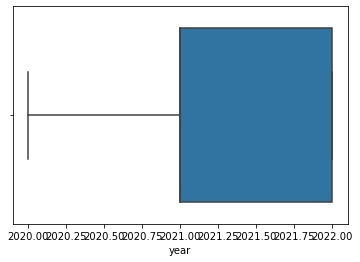

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


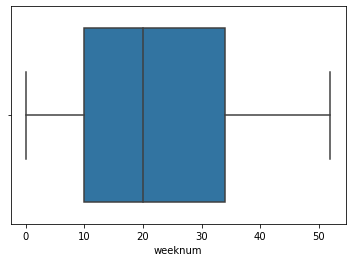

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


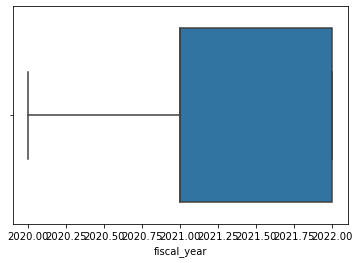

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


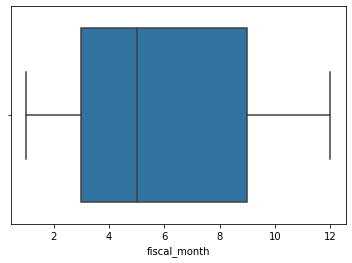

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


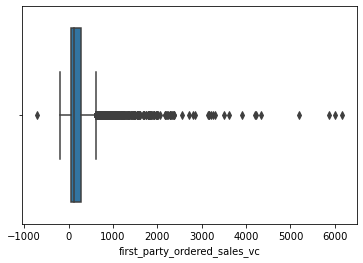

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


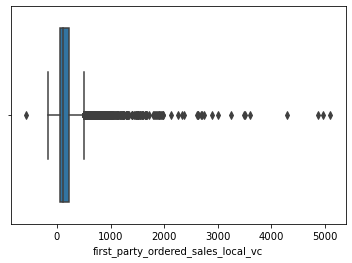

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


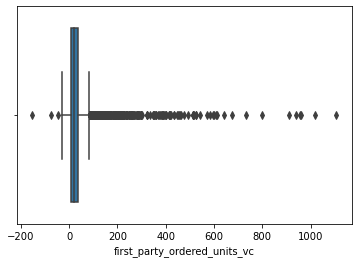

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


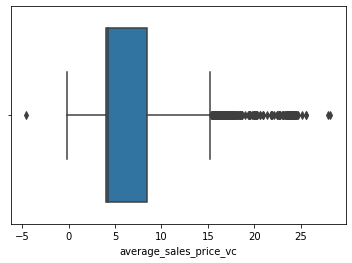

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


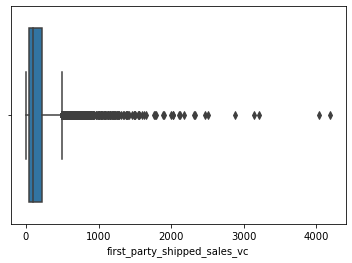

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


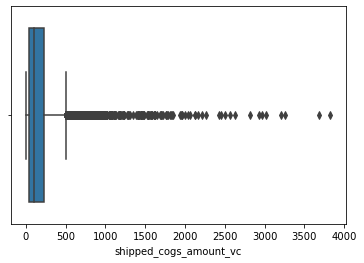

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


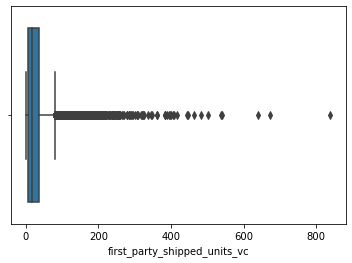

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


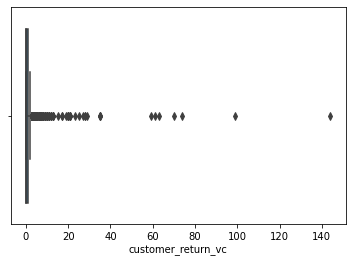

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


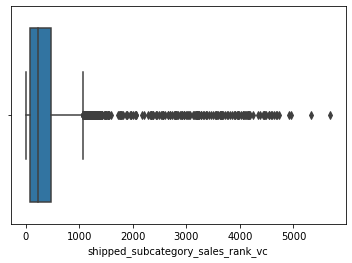

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


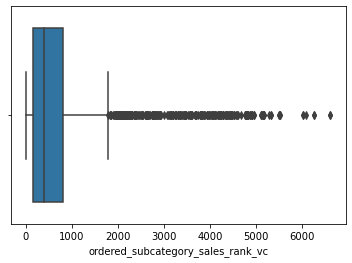

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


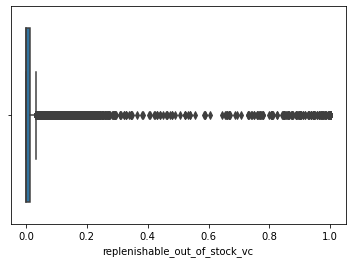

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


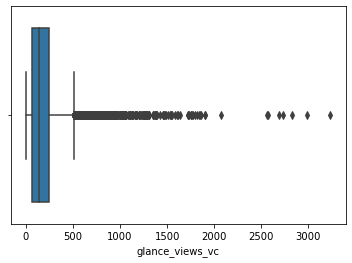

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


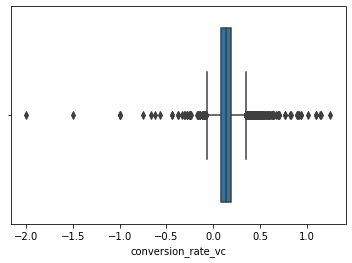

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


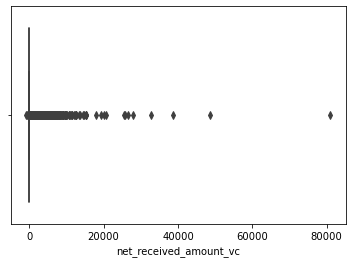

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


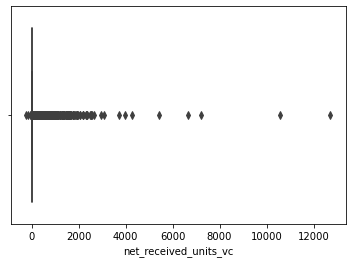

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


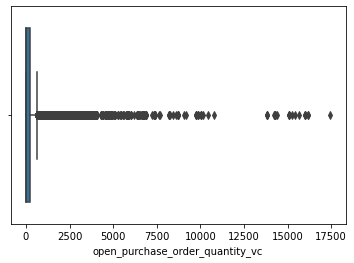

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


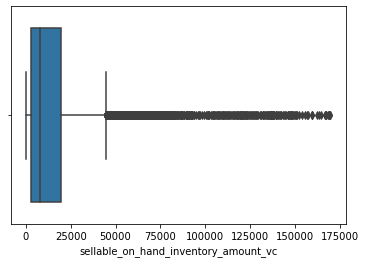

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


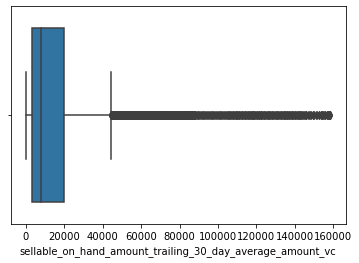

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


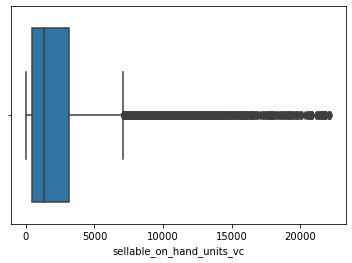

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


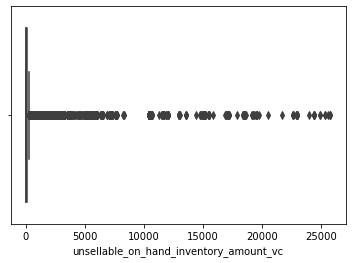

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


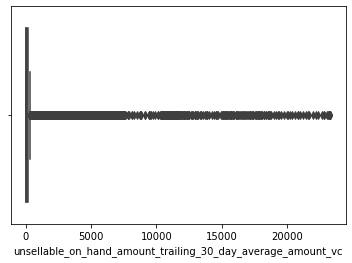

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


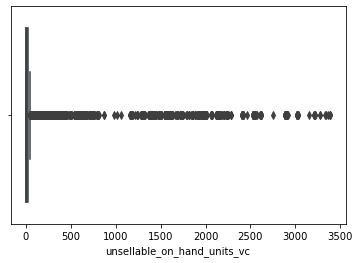

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


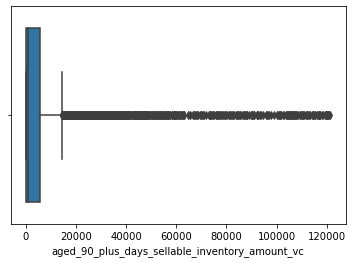

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


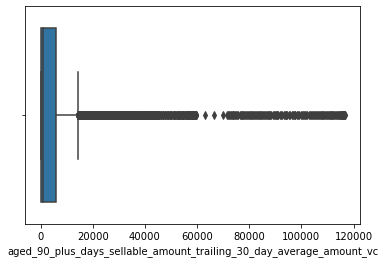

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


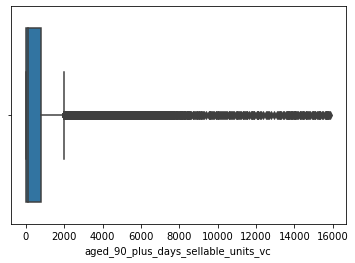

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


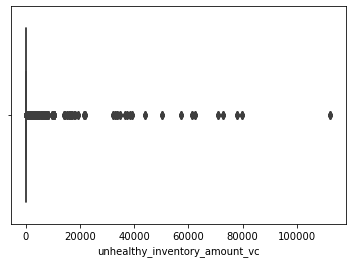

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


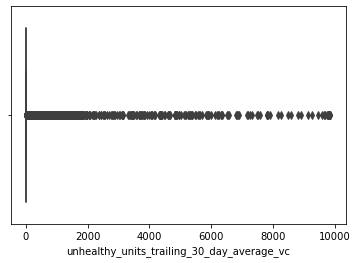

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


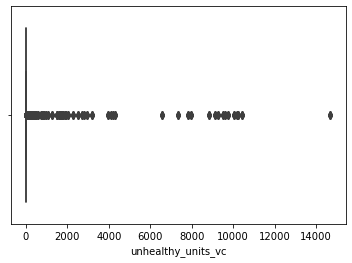

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


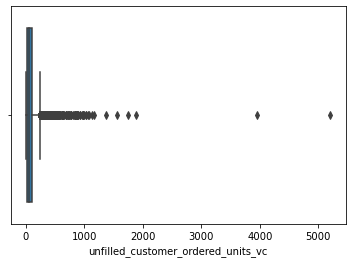

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


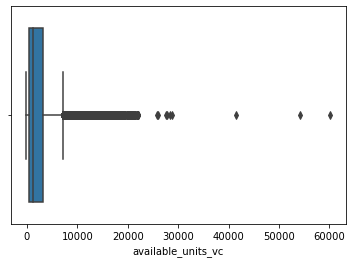

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


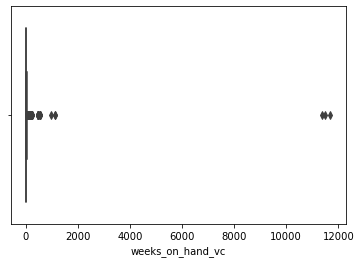

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


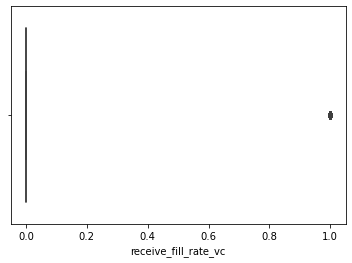

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


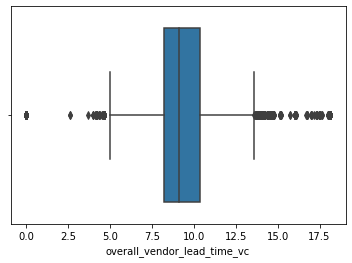

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


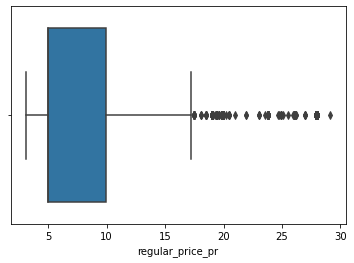

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


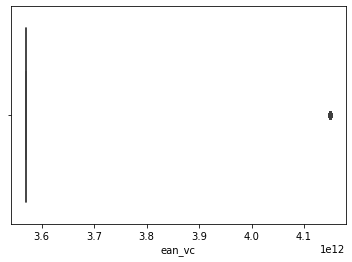

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


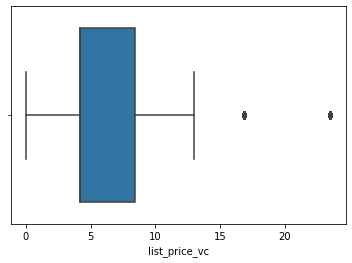

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


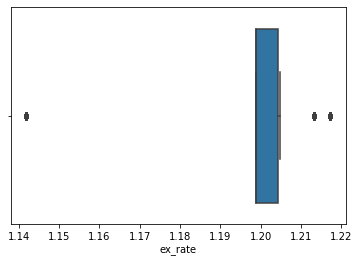

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


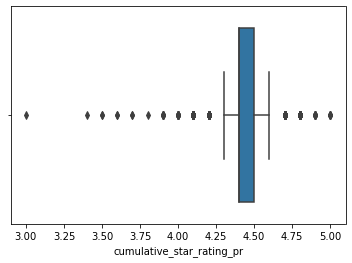

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


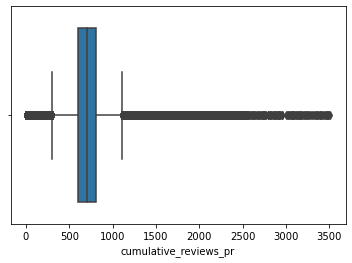

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


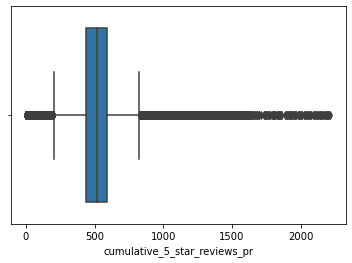

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


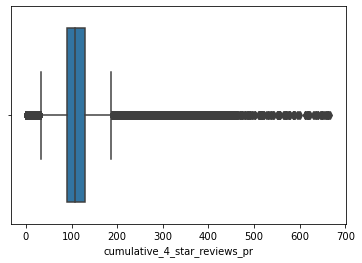

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


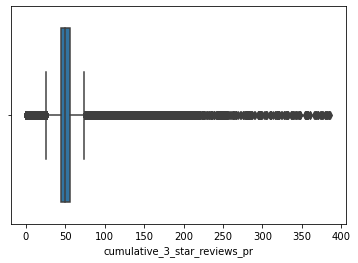

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


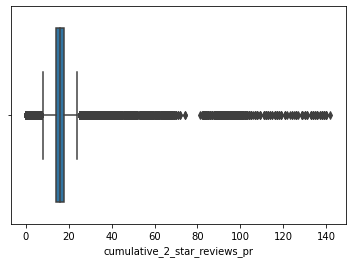

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


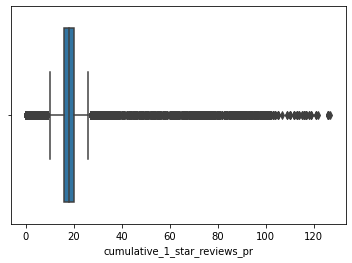

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


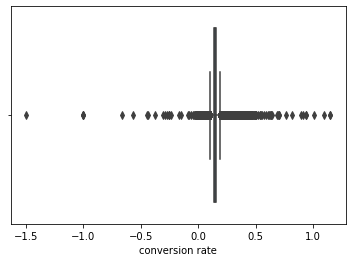

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


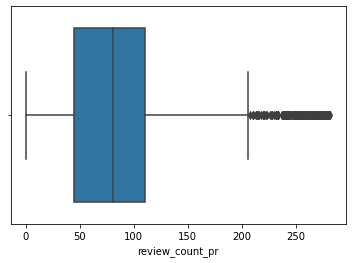

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


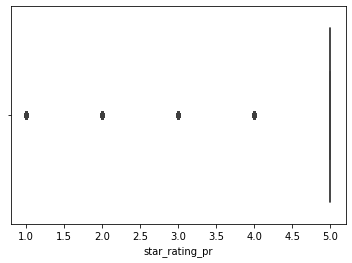

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


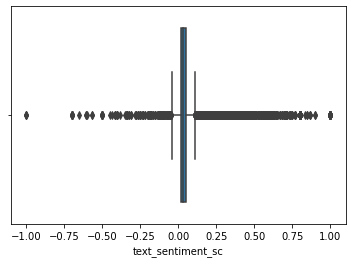

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


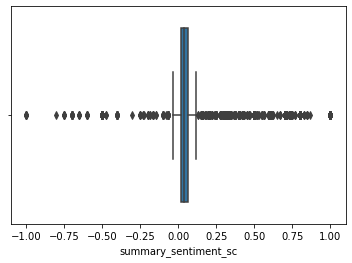

In [34]:
#Checking for ouliers before treatment
for i in df_numerical[1:]:
    sns.boxplot(df_numerical[i])
    plt.pause(.05)

In [35]:
df_numerical=df_numerical.apply(lambda x: outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


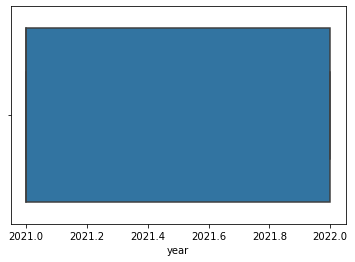

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


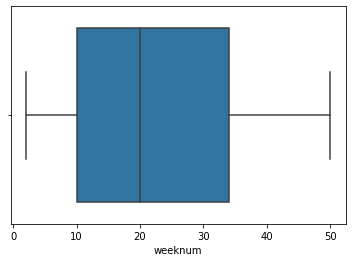

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


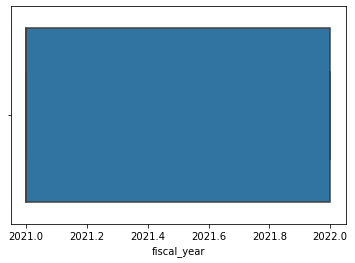

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


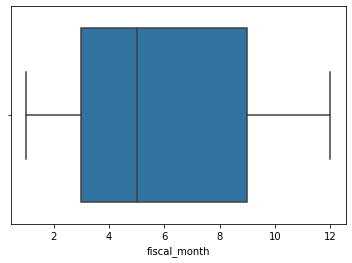

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


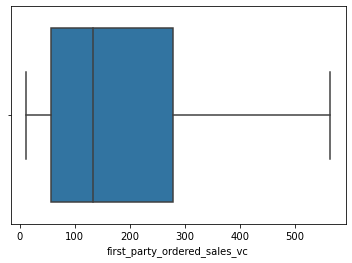

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


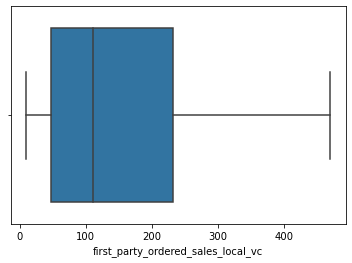

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


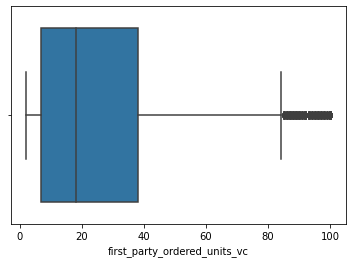

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


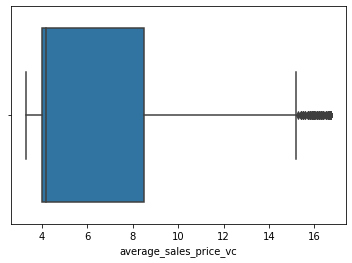

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


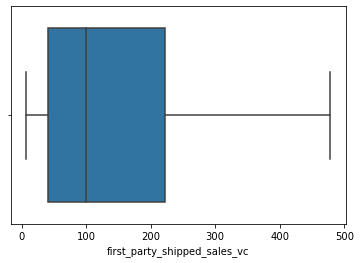

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


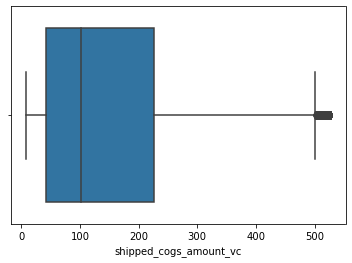

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


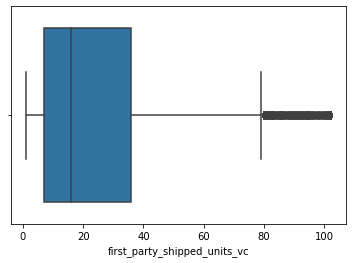

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


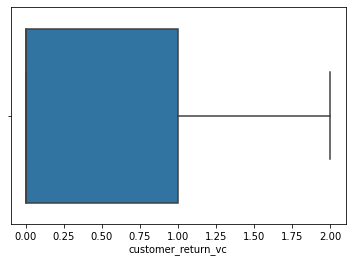

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


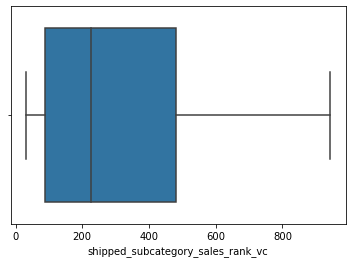

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


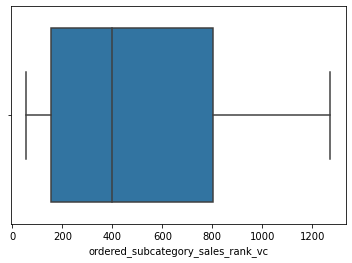

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


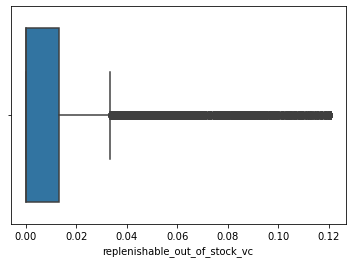

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


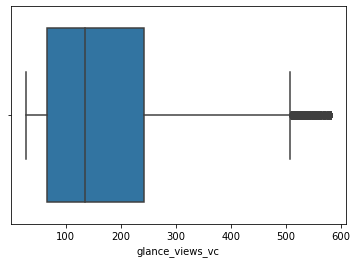

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


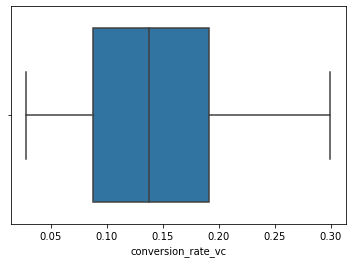

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


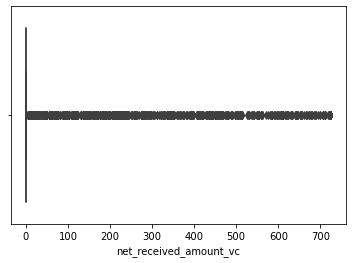

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


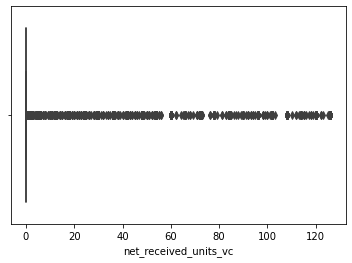

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


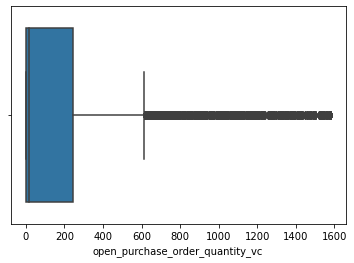

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


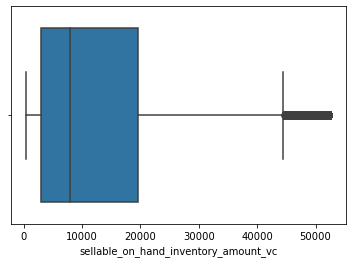

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


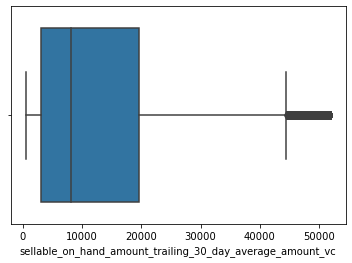

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


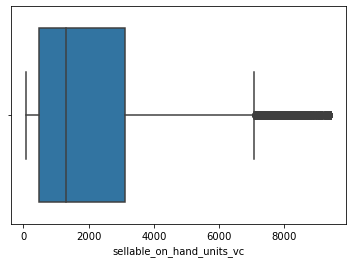

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


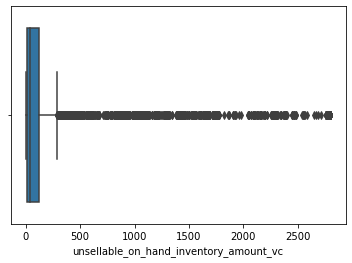

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


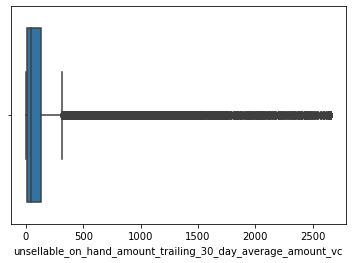

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


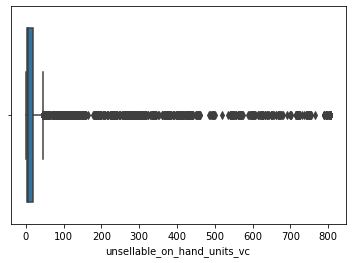

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


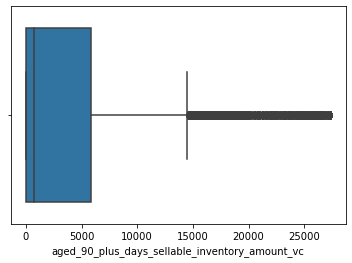

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


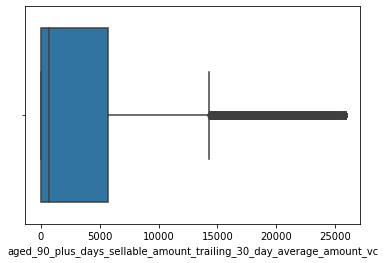

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

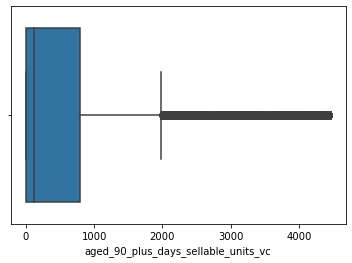

In [35]:
#Checking for ouliers after treatment   all except first_party_ordered_sales_vc,first_party_ordered_sales_local_va
# first_party_shipped_sales_vc, customer_return_vc,shipped_subcategory_sales_rank_vc,ordered_subcategory_sales_rank
# conversion_rate_vc,unfilled_customer_ordered_units_vc,ean_vc,cumulative_star_rating_pr
for i in df_numerical[1:]:
    sns.boxplot(df_numerical[i])
    plt.pause(.05)

# Filling missing values in categorical features with mode

In [36]:
df_categorical=df_categorical.apply(lambda x: x.fillna(x.mode().iloc[0]))

In [37]:
df_categorical.isnull().sum()

date                                                                          0
asin                                                                          0
gsr_level_2                                                                   0
isavc_vc                                                                      0
isprofitero_pr                                                                0
first_party_ordered_sales_currency_code_vc                                    0
first_party_ordered_sales_local_currency_code_vc                              0
first_party_shipped_sales_currency_code_vc                                    0
shipped_cogs_currency_code_vc                                                 0
preordered_revenue_currency_code_vc                                           0
net_received_amount_currency_code_vc                                          0
sellable_on_hand_inventory_currency_code_vc                                   0
sellable_on_hand_amount_trailing_30_day_

Dropping Categorical Features which are irrelevant since they dont have more than 1 category

In [38]:
df_categorical.drop(['first_party_ordered_sales_currency_code_vc',
                   'first_party_ordered_sales_local_currency_code_vc',
                    'first_party_shipped_sales_currency_code_vc',
                    'shipped_cogs_currency_code_vc','preordered_revenue_currency_code_vc',
                     'net_received_amount_currency_code_vc',
                     'sellable_on_hand_inventory_currency_code_vc',
                     'sellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
                    'unsellable_on_hand_inventory_currency_code_vc',
                    'unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
                    'aged_90_plus_days_sellable_inventory_currency_code_vc',
                    'aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc',
                    'unhealthy_inventory_currency_code_vc','selling_program_name_vc',
                     'isbn_13_vc','binding_vc','local_currency',
                      'target_currency','match_type_pr','type_pr','isavc_vc',
                     'isprofitero_pr','sitb_vc','parent_asin_vc','prime_pantry_pr',
                    'critical_pr','model_style_number_vc'],axis=1,inplace=True)

In [39]:
df_categorical.shape

(14356, 30)

Variables that have to cleaned: prep_instructions_vendor_state_vc, prep_instructions_required_vc and
 colour_vc

In [40]:
df_categorical.colour_vc.value_counts()

UNKNOWN    13453
Blau         520
blau         307
white         76
Name: colour_vc, dtype: int64

In [41]:
df_categorical.prep_instructions_required_vc.value_counts()

-                        13257
Bagging, Set creation      551
Set creation, Bagging      548
Name: prep_instructions_required_vc, dtype: int64

In [42]:
df_categorical.prep_instructions_vendor_state_vc.value_counts()

Amazon            13139
Vendor              551
-                   359
CPEX Certified      307
Name: prep_instructions_vendor_state_vc, dtype: int64

In [43]:
df_categorical.prep_instructions_vendor_state_vc.value_counts()

Amazon            13139
Vendor              551
-                   359
CPEX Certified      307
Name: prep_instructions_vendor_state_vc, dtype: int64

In [44]:
df_categorical.head()

date        asin      gsr_level_2 availability_pr  \
0  20-12-2020  B000W6PY1W  Acne Treatments               Y   
1  20-12-2020  B071936B11        Cleansers               Y   
2  20-12-2020  B075KJBF9H     Moisturisers               Y   
3  20-12-2020  B07BVW522M     Moisturisers               Y   
4  20-12-2020  B07JMXSSYN        Cleansers               Y   

  third_party_seller_pr clothing_size_vc product_group_vc  \
0                amazon               50           Beauty   
1                amazon               25           Beauty   
2                amazon               15           Beauty   
3                amazon               30           Beauty   
4                amazon              400           Beauty   

  replenishment_code_vc colour_vc prep_instructions_required_vc  \
0                    PR   UNKNOWN                             -   
1                    PR   UNKNOWN                             -   
2                    PR   UNKNOWN         Set creation, Bagging   
3                    PR   UNKNOWN                             -   
4                    PR   UNKNOWN         Bagging, Set creation   

  prep_instructions_vendor_state_vc  sponsored_pr  third_party_only_pr  \
0                            Amazon         False                 True   
1                            Vendor         False                 True   
2                            Amazon         False                 True   
3                            Amazon         False                 True   
4                            Amazon         False                 True   

   amazon_choice_pr  amazon_bestseller_pr  amazon_subscribe_and_save_pr  \
0             False                 False                         False   
1             False                 False                         False   
2             False                 False                         False   
3             False                 False                         False   
4             False                 False                         False   

   amazon_prime_pr  amazon_addon_item_pr condition_pr  customer_product_pr  \
0            False                 False            Y                False   
1            False                 False            Y                 True   
2            False                 False            Y                 True   
3            False                 False            Y                 True   
4            False                 False            Y                 True   

   free_replacements_vc  first_party_won_buy_box_pr  colour_count_vc  \
0                     0                         1.0              0.0   
1                     0                         1.0              1.0   
2                     0                         1.0              1.0   
3                     0                         1.0              1.0   
4                     0                         1.0              0.0   

   number_of_images_pr  isinventory_vc  useful_ratings_negative  \
0                  7.0            True                        0   
1                  7.0            True                        0   
2                  7.0            True                        2   
3                  7.0            True                        0   
4                  7.0            True                        0   

   useful_ratings_positive  feature_wise_rating  qna_answered  \
0                        4                    1             7   
1                        3                    1             9   
2                        0                    1             0   
3                        4                    1             6   
4                        4                    1             0   

   item_to_consider  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [45]:
df_categorical['clothing_size_vc'].value_counts()

50         2398
50         1666
150        1640
200        1329
150        1061
200         875
15          666
15          582
25          333
30          333
400         333
3           332
75          332
1           332
125         324
75          219
2           219
25          218
30          218
400         218
1           188
125         188
3           188
2            88
UNKNOWN      76
Name: clothing_size_vc, dtype: int64

# Cleaning Categorical Variables (imputing categories with frequency)

In [46]:
df_categorical['clothing_size_vc'].replace({50:2398, 50:1666, 150:1640, 200:1329, 150:1061, 
200:875, 15:666, 15:582,25:333, 30:333,400:333,3:332,75:332,1:332,125:324,75:219,2:219, 
25:218, 30:218, 400:218,1:188 ,125:188,3:188,2:88, 'UNKNOWN':76},inplace=True)

In [47]:
df_categorical['gsr_level_2'].replace({'Acne Treatments':1,'Cleansers':2,'Moisturisers':3},inplace=True)
df_categorical['availability_pr'].replace({'Y':0,'N':1,'D':2},inplace=True)

df_categorical['third_party_seller_pr'].replace({'amazon':14110,'amazon.de':192,'-':22,
'scinfinita e-handel':7,'zeitburg schmuck & uhren':6,'apo-discounter online apotheke':4,
'my perfect brands':4,'apotheke online':3,'horn medical producing and trading':3,
'deutscheseck':2,'medpex':1,'sediva deutschland':1,'pb recommerce gmbh':1},inplace=True)

df_categorical['clothing_size_vc'].replace({50:2398, 50:1666, 150:1640, 200:1329, 150:1061, 
200:875, 15:666, 15:582,25:333, 30:333,400:333,3:332,75:332,1:332,125:324,75:219,2:219, 
25:218, 30:218, 400:218,1:188 ,125:188,3:188,2:88, 'UNKNOWN':76},inplace=True)

df_categorical['product_group_vc'].replace({'Beauty':1,'Fresh_Ambient':2},inplace=True)
df_categorical['replenishment_code_vc'].replace({'PR':13824,'OS':307,'-':149,'NP':76},inplace=True)
df_categorical['colour_vc'].replace({'UNKNOWN':1,'Blau':2, 'blau':2, 'white':3},inplace=True)

df_categorical['prep_instructions_vendor_state_vc'] = np.where(df_categorical.prep_instructions_vendor_state_vc=="-",'Amazon',
                                                      np.where(df_categorical.prep_instructions_vendor_state_vc=='Amazon','Amazon',np.where(df_categorical.prep_instructions_vendor_state_vc=='Vendor','Vendor','CPEX Certified')))

df_categorical['prep_instructions_required_vc'].replace({'-':13257,'Bagging, Set creation':557,'Set creation, Bagging':548},inplace=True)

df_categorical['sponsored_pr'].replace({True:1,False:0},inplace=True)
df_categorical['third_party_only_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_choice_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_bestseller_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_subscribe_and_save_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_prime_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_addon_item_pr'].replace({True:1,False:0},inplace=True)
df_categorical['condition_pr'].replace({'Y':1,'N':0},inplace=True)
df_categorical['amazon_choice_pr'].replace({True:1,False:0},inplace=True)
df_categorical['customer_product_pr'].replace({True:1,False:0},inplace=True)
df_categorical['isinventory_vc'].replace({True:1,False:0},inplace=True)


In [48]:
df_categorical['prep_instructions_vendor_state_vc'].replace({'Amazon':1,'Vendor':2,'CPEX Certified':3},inplace=True)

In [49]:
df_categorical.head()

date        asin  gsr_level_2  availability_pr  \
0  20-12-2020  B000W6PY1W            1                0   
1  20-12-2020  B071936B11            2                0   
2  20-12-2020  B075KJBF9H            3                0   
3  20-12-2020  B07BVW522M            3                0   
4  20-12-2020  B07JMXSSYN            2                0   

   third_party_seller_pr clothing_size_vc  product_group_vc  \
0                  14110             1666                 1   
1                  14110              218                 1   
2                  14110              582                 1   
3                  14110              218                 1   
4                  14110              218                 1   

   replenishment_code_vc  colour_vc  prep_instructions_required_vc  \
0                  13824          1                          13257   
1                  13824          1                          13257   
2                  13824          1                            548   
3                  13824          1                          13257   
4                  13824          1                            557   

   prep_instructions_vendor_state_vc  sponsored_pr  third_party_only_pr  \
0                                  1             0                    1   
1                                  2             0                    1   
2                                  1             0                    1   
3                                  1             0                    1   
4                                  1             0                    1   

   amazon_choice_pr  amazon_bestseller_pr  amazon_subscribe_and_save_pr  \
0                 0                     0                             0   
1                 0                     0                             0   
2                 0                     0                             0   
3                 0                     0                             0   
4                 0                     0                             0   

   amazon_prime_pr  amazon_addon_item_pr  condition_pr  customer_product_pr  \
0                0                     0             1                    0   
1                0                     0             1                    1   
2                0                     0             1                    1   
3                0                     0             1                    1   
4                0                     0             1                    1   

   free_replacements_vc  first_party_won_buy_box_pr  colour_count_vc  \
0                     0                         1.0              0.0   
1                     0                         1.0              1.0   
2                     0                         1.0              1.0   
3                     0                         1.0              1.0   
4                     0                         1.0              0.0   

   number_of_images_pr  isinventory_vc  useful_ratings_negative  \
0                  7.0               1                        0   
1                  7.0               1                        0   
2                  7.0               1                        2   
3                  7.0               1                        0   
4                  7.0               1                        0   

   useful_ratings_positive  feature_wise_rating  qna_answered  \
0                        4                    1             7   
1                        3                    1             9   
2                        0                    1             0   
3                        4                    1             6   
4                        4                    1             0   

   item_to_consider  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [50]:
df_categorical.drop(['asin','date'],axis=1,inplace=True)

In [51]:
df_categorical['condition_pr'].value_counts()

1    14191
0      165
Name: condition_pr, dtype: int64

In [52]:
data_new = pd.concat([df_numerical, df_categorical], axis=1)

In [53]:
data_new.shape

(14356, 81)

In [54]:
data_new.drop(['year','weeknum','fiscal_year','fiscal_month',
               'clothing_size_vc'],axis=1,inplace=True)

In [55]:
data_new.shape

(14356, 76)

In [ ]:
#data_new[data_new.asin=='B000W6PY1W'].replace(0, 0.027913)  

#data_new['new']=np.where(data_new['text_sentiment_sc']==0) and (np.where(data_new.asin.unique()),data_new.text_sentiment_sc.mean())

#for i in data_new.asin.unique():
    #print(i)
   # if(data_new.text_sentiment_sc==0):
    #    i=data_new.text_sentiment_sc.mean()
    
    #data_new[((data_new.asin==i) & 
              #(data_new.text_sentiment_sc==0.0))].replace(0.0, data_new.text_sentiment_sc.mean())  

#for i in data_new.asin.unique():
  #  data_new[i]=np.where(data_new['text_sentiment_sc']==0,data_new['text_sentiment_sc'].mean(),data_new[i])

In [56]:
data_new.head()

first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                         240.7                              210.85   
1                         197.6                              173.04   
2                         326.9                              286.26   
3                         227.5                              199.25   
4                          14.7                               12.91   

   first_party_ordered_units_vc  average_sales_price_vc  \
0                          59.0                     3.6   
1                          14.0                    12.4   
2                          18.0                    15.9   
3                          25.0                     8.0   
4                           2.0                    12.9   

   first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
0                         33.95                   47.67   
1                        119.85                  107.40   
2                         59.05                   59.44   
3                        127.91                  145.28   
4                         38.73                   34.07   

   first_party_shipped_units_vc  customer_return_vc  \
0                           9.0                 0.0   
1                          10.0                 0.0   
2                           4.0                 0.0   
3                          16.0                 0.0   
4                           3.0                 0.0   

   shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
0                              550.0                              172.0   
1                              165.0                              289.0   
2                              343.0                             1272.0   
3                              151.0                              209.0   
4                              505.0                             1148.0   

   replenishable_out_of_stock_vc  glance_views_vc  conversion_rate_vc  \
0                         0.0000            362.0              0.1630   
1                         0.0000             83.0              0.1687   
2                         0.0000            114.0              0.1579   
3                         0.0144            341.0              0.0733   
4                         0.0000             28.0              0.0526   

   net_received_amount_vc  net_received_units_vc  \
0                     0.0                    0.0   
1                     0.0                    0.0   
2                     0.0                    0.0   
3                     0.0                    0.0   
4                     0.0                    0.0   

   open_purchase_order_quantity_vc  sellable_on_hand_inventory_amount_vc  \
0                              0.0                                 374.0   
1                              0.0                                 374.0   
2                              0.0                                 374.0   
3                              0.0                                 374.0   
4                              0.0                                 374.0   

   sellable_on_hand_amount_trailing_30_day_average_amount_vc  \
0                                            547.365           
1                                            547.365           
2                                            547.365           
3                                            547.365           
4                                            547.365           

   sellable_on_hand_units_vc  unsellable_on_hand_inventory_amount_vc  \
0                       76.0                                     0.0   
1                       76.0                                     0.0   
2                       76.0                                     0.0   
3                       76.0                                     0.0   
4                       76.0                                     0.0   

   unsellable_on_hand_amount_trailing_30_day_average_amou

# Variable Reduction

In [57]:
from pandas import Series, DataFrame
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [58]:
data_new.drop('conversion rate',axis=1,inplace=True)

In [59]:
data_new.shape

(14356, 75)

# Select K Best

In [60]:
X = data_new[data_new.columns.difference(['conversion_rate_vc'])]
SKB = SelectKBest(f_regression, k=30).fit(X, data_new[['conversion_rate_vc']] )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -


In [61]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [62]:
imp_vars_SKB

['aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'cumulative_3_star_reviews_pr',
 'cumulative_5_star_reviews_pr',
 'cumulative_reviews_pr',
 'first_party_ordered_sales_local_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'open_purchase_order_quantity_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'shipped_cogs_amount_vc',
 'shipped_subcategory_sales_rank_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']

In [63]:
final_data=data_new[['aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'cumulative_3_star_reviews_pr',
 'cumulative_5_star_reviews_pr',
 'cumulative_reviews_pr',
 'first_party_ordered_sales_local_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'open_purchase_order_quantity_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'shipped_cogs_amount_vc',
 'shipped_subcategory_sales_rank_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc','conversion_rate_vc']]

final_features=data_new[['aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'cumulative_3_star_reviews_pr',
 'cumulative_5_star_reviews_pr',
 'cumulative_reviews_pr',
 'first_party_ordered_sales_local_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'open_purchase_order_quantity_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'shipped_cogs_amount_vc',
 'shipped_subcategory_sales_rank_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]

# Feature Reduction through OLS Regression

In [64]:
y=final_data.conversion_rate_vc
X=final_data.drop('conversion_rate_vc',axis=1)

In [65]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     conversion_rate_vc   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              7485.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                        0.00
Time:                        11:13:10   Log-Likelihood:                          25972.
No. Observations:               14356   AIC:                                 -5.188e+04
Df Residuals:                   14326   BIC:                                 -5.166e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                                                                  coef    std err          t      P>|t|      [0.025     

Dropping all variables from OLS Regression that are insiginificant with a P-value more than 0.05 These
are :

Cumulative 3 star reviews,
Cumulative 5 star reviews,
Cumulative reviews,
first party ordered local sales vc,
first party ordered sales vc,
open purchase order quantity,
shipped cogs amount,
shipped subcategory sales rank,
unsellable_on_hand_amount_trailing_30_day_average_amount_vc

Retaining all other 22 variables in the dataset for final model.

Setting all the above features from Select K Best and OLS Regression final_data.

In [66]:
# These features are the same coming from Select K Best and OLS Regression. So setting 
# final_data (in the cell below) as the final features

final_data=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc','conversion_rate_vc']]


x_vars=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'average_sales_price_vc',
 'colour_vc',
 'first_party_ordered_sales_vc',
 'first_party_ordered_units_vc',
 'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'sellable_on_hand_inventory_amount_vc',
 'sellable_on_hand_units_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]


# Running VIF on final dataset of 22 features

In [67]:
X_new = x_vars
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [68]:
vif.sort_values(by='VIF_Factor',ascending=False)

VIF_Factor                                           features
18   67.826479                          sellable_on_hand_units_vc
17   49.990013               sellable_on_hand_inventory_amount_vc
2    48.175500                                 available_units_vc
4    44.566065                                          colour_vc
6    43.213432                       first_party_ordered_units_vc
3    38.160084                             average_sales_price_vc
5    35.895645                       first_party_ordered_sales_vc
16   35.758779  sellable_on_hand_amount_trailing_30_day_averag...
8    34.196028                       first_party_shipped_units_vc
7    33.464904                       first_party_shipped_sales_vc
15   29.339424                                   regular_price_pr
13   23.973821                      prep_instructions_required_vc
9    16.282984                                    glance_views_vc
10   16.263185                                        gsr_level_2
20   15.859406             unsellable_on_hand_inventory_amount_vc
21   15.628855                        unsellable_on_hand_units_vc
19   11.653679                 unfilled_customer_ordered_units_vc
11    9.376312                                      list_price_vc
14    5.513451                                       qna_answered
12    5.213387                  ordered_subcategory_sales_rank_vc
0     2.440119                aged_90_plus_days_sellable_units_vc
1     1.331952                                    availability_pr

In [69]:
# Manually deleted all variables one by one which were having a threshold value of more than 20. 

x_vars=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 #'average_sales_price_vc',
 #'colour_vc',
 'first_party_ordered_sales_vc',
 #'first_party_ordered_units_vc',
 #'first_party_shipped_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 #'sellable_on_hand_inventory_amount_vc',
 #'sellable_on_hand_units_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]

In [70]:
X_new = x_vars
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [71]:
vif.sort_values(by='VIF_Factor',ascending=False)

VIF_Factor                                           features
14   15.767077             unsellable_on_hand_inventory_amount_vc
15   15.472070                        unsellable_on_hand_units_vc
5    13.568038                                    glance_views_vc
6    13.472169                                        gsr_level_2
9    12.258570                      prep_instructions_required_vc
12   11.984133  sellable_on_hand_amount_trailing_30_day_averag...
3    11.020263                       first_party_ordered_sales_vc
13   10.086718                 unfilled_customer_ordered_units_vc
2     9.702146                                 available_units_vc
7     7.522929                                      list_price_vc
4     6.849139                       first_party_shipped_units_vc
11    6.178704                                   regular_price_pr
10    4.958955                                       qna_answered
8     4.811655                  ordered_subcategory_sales_rank_vc
0     2.185084                aged_90_plus_days_sellable_units_vc
1     1.111987                                    availability_pr

In [73]:
#Defining only the features of the final dataset excluding the target variable (to later calculate 
# coefficients)

x_vars=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'first_party_ordered_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc']]

In [75]:
# Final Dataset of 16 features, after running SELECT K BEST, OLS REGRESSION AND VIF

data_vif=data_new[[
'aged_90_plus_days_sellable_units_vc',
 'availability_pr',
 'available_units_vc',
 'first_party_ordered_sales_vc',
 'first_party_shipped_units_vc',
 'glance_views_vc',
 'gsr_level_2',
 'list_price_vc',
 'ordered_subcategory_sales_rank_vc',
 'prep_instructions_required_vc',
 'qna_answered',
 'regular_price_pr',
 'sellable_on_hand_amount_trailing_30_day_average_amount_vc',
 'unfilled_customer_ordered_units_vc',
 'unsellable_on_hand_inventory_amount_vc',
 'unsellable_on_hand_units_vc','conversion_rate_vc']]

Taking only those features in model which have been selected by First Funnel Approach i.e.
1. Select K Best   (first 30 features)
2. OLS Regression  (out of 30, 22 features)
3. VIF             (out of 22 features, final dataset contains 16 features)

# Running the model with Linear Regression

In [87]:
X = data_vif.drop('conversion_rate_vc',axis=1).values
y = y_vars.values

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [90]:
y_train

array([0.1463 , 0.2476 , 0.0459 , ..., 0.1614 , 0.29945, 0.1194 ])

In [91]:
linreg=LinearRegression()

In [92]:
linreg.fit(X_train,y_train)
## Evaluating the Linear Regression model
#print(linearModel.score(X_test, y_test))

LinearRegression()

In [93]:
y_pred_tst_lr=linreg.predict(X_test)
y_pred_train_lr=linreg.predict(X_train)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train_lr)

0.6529935261532556

In [95]:
r2_score(y_test, y_pred_tst_lr)

0.6405408086968309

In [96]:
coefficients = pd.concat([pd.DataFrame(x_vars.columns),pd.DataFrame(np.transpose(linreg.coef_))], axis = 1)

In [97]:
coefficients.rename(columns={0:'Features',0:'coefficients'}).head(16)

coefficients  coefficients
0                 aged_90_plus_days_sellable_units_vc -1.851197e-06
1                                     availability_pr -6.045130e-02
2                                  available_units_vc  2.435710e-06
3                        first_party_ordered_sales_vc  4.748910e-04
4                        first_party_shipped_units_vc  4.825339e-04
5                                     glance_views_vc -5.185383e-04
6                                         gsr_level_2  1.699498e-04
7                                       list_price_vc -4.752494e-03
8                   ordered_subcategory_sales_rank_vc -2.007917e-05
9                       prep_instructions_required_vc  3.361639e-06
10                                       qna_answered -2.095644e-03
11                                   regular_price_pr -4.127726e-03
12  sellable_on_hand_amount_trailing_30_day_averag... -9.793083e-07
13                 unfilled_customer_ordered_units_vc  2.732037e-04
14             unsellable_on_hand_inventory_amount_vc -5.856161e-06
15                        unsellable_on_hand_units_vc  1.840741e-05

In [98]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics 

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(y_train, y_pred_train_lr)

0.0018860266494226056

In [101]:
mean_squared_error(y_test, y_pred_tst_lr)

0.001899219683739192

# Ridge (L2) Regression

In [102]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.6405400348445004


In [103]:
y_pred_tst_rid=ridgeModelChosen.predict(X_test)
y_pred_train_rid=ridgeModelChosen.predict(X_train)

In [104]:
print(ridgeModelChosen.score(X_train, y_train))

0.6529927704847707


In [105]:
mean_squared_error(y_train, y_pred_train_rid)

0.0018860307565820053

# Lasso (L1) Regression

In [106]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha =0.015, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.6044036575269616


In [107]:
y_pred_tst_las=lassoModelChosen.predict(X_test)
y_pred_train_las=lassoModelChosen.predict(X_train)

In [108]:
print(lassoModelChosen.score(X_train, y_train))

0.618602038156141


In [109]:
mean_squared_error(y_train, y_pred_train_las)

0.002072948991697127

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [111]:
regrr = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(max_depth=6),GradientBoostingRegressor(n_estimators=100),
         XGBRegressor(n_estimators=100),LGBMRegressor(n_estimators=100)]

In [112]:
%%time
tr= []
te =[]
rmse=[]
for mod in regrr:
    model = mod
    model.fit(X_train,y_train)
    y_pred_tst=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    pred_tr = model.predict(X_train)
    pred_te = model.predict(X_test)
    tr.append(r2_score(y_train,y_pred_train))
    te.append(r2_score(y_test,y_pred_tst))
    rmse.append(mean_squared_error(y_train, y_pred_train))

Wall time: 9.44 s


In [113]:
model_nm = 'Linearreg DT RF GBM XGB LGB'.split()
result = pd.DataFrame({'model':model_nm,'train_score':tr,'test_score':te,'RMSE':rmse})

In [114]:
result

model  train_score  test_score      RMSE
0  Linearreg     0.652994    0.640541  0.001886
1         DT     0.986159    0.923949  0.000075
2         RF     0.664485    0.621914  0.001824
3        GBM     0.874759    0.858989  0.000681
4        XGB     0.983633    0.930073  0.000089
5        LGB     0.959053    0.936680  0.000223